<a href="https://colab.research.google.com/github/vamsi434/my-ml-project/blob/main/Gold_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 

In [ ]:
#DATA COLLECTION AND PROCESSING
#loading the csv data to a pandas dataframe
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [ ]:
#print first five rows in data frame
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
#number of rows and columns
gold_data.shape

(2290, 6)

In [ ]:
#getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
#checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
#getting statistical measures of data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
#Correlation:
# 1.positive correlation
# 2.negative correlation

In [ ]:
correlation = gold_data.corr()

<ipython-input-12-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

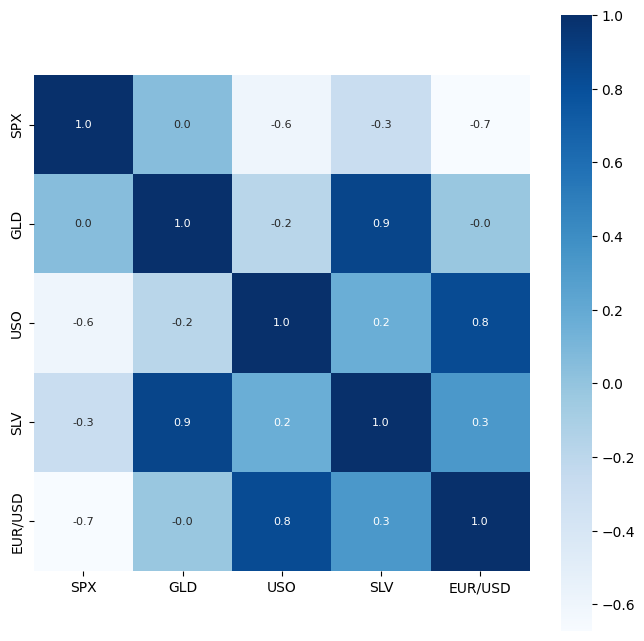

In [ ]:
#constructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8},cmap='Blues')

In [ ]:
#correlation values of GND
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-16-91d42ce9d5a9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

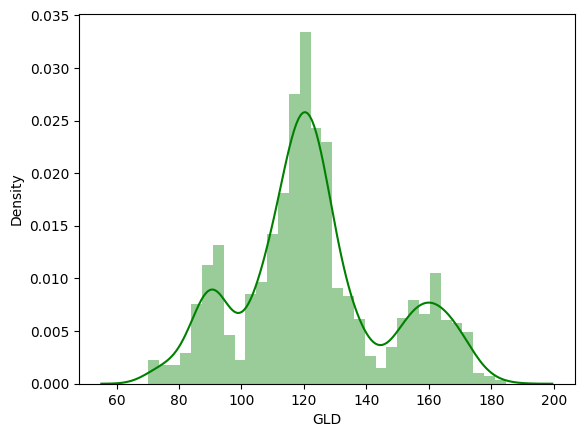

In [ ]:
#checking the distribution of the GLD price
sns.distplot(gold_data['GLD'],color='green')

In [ ]:
#splitting the features an target
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [ ]:
#splitting into training data and test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
#model training
#RandomFOrestRegressor
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
#Evaluate the model
#prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.33459872  82.03859965 116.07860015 127.5197008  120.60270106
 154.8907974  150.18219875 126.06420097 117.50349878 126.02980069
 116.68350083 171.71930065 141.83369785 167.99859819 115.18279999
 117.37670067 139.12970353 170.44250085 159.47570318 160.19179966
 155.15710046 125.21490031 175.81689965 157.72920244 125.13470049
  93.68459971  76.94980019 120.37570023 119.05429918 167.48109898
  88.20400062 124.9956996   91.04030074 117.66410037 121.06359877
 136.45840047 115.5556012  115.30100059 148.1999007  107.1459009
 104.01300228  87.25529789 126.51920054 117.81859936 153.81889846
 119.52240004 108.40349989 108.28389829  93.17720031 127.31219745
  74.77350059 113.71639924 121.20240035 111.31549894 118.95739881
 120.75599945 158.82700007 168.40110166 147.00019684  85.96879848
  94.36890028  86.75199889  90.52590028 118.88170073 126.34370057
 127.51900007 170.85480018 122.20359924 117.3616988   98.7150002
 168.32060185 142.81629829 132.22420247 121.1704021  121.39519942
 119.6547004

In [ ]:
#R sqaured error
error_score = metrics.r2_score(Y_test, test_data_prediction)

In [ ]:
print("R sqaured error", error_score)

R sqaured error 0.9891672925038881


In [ ]:
Y_test=list(Y_test)

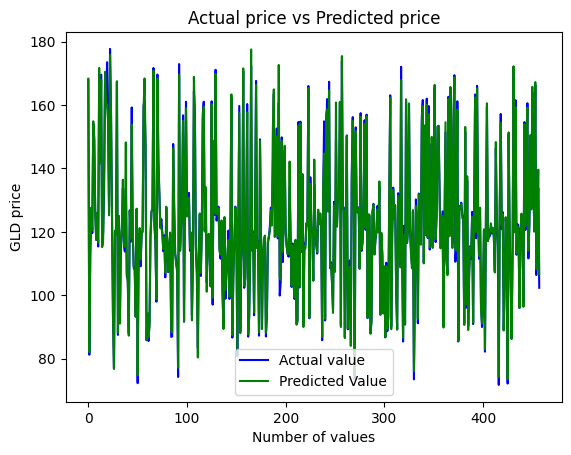

In [ ]:
plt.plot(Y_test, color='blue',label = 'Actual value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual price vs Predicted price')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()

In [ ]:
import pickle

# Assuming you have a trained model named 'model'
filename = 'Gold_price.pkl'

with open(filename, 'wb') as file:
    pickle.dump(regressor, file)

file.close()


In [34]:
X.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099
